<a href="https://colab.research.google.com/github/franckalain/Machine-learning-Projects/blob/master/Scikit%20Learn/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!ls "/content/drive/"

'My Drive'


In [3]:
import os
os.chdir("drive/My Drive/SCIKITLEARN")
!ls

breast-cancer.csv  cache  Logistics_Regression.ipynb  Scikit_Learn_KNN.ipynb


making inferences from labeled data.

**Classification (categorical data)**
binary classification (tumor: benign, malignant)
multiclass classification (books: maths, physics, stats, psychology, etc.)
example algorithms: KNN, Linear Models, Decision Trees, SVMs, etc.

**Regression (continuous data)**
predicting income, price of stock, age, and other continous data
example algorithms: KNN, Linear Models, Decision Trees, SVMs, etc.
Linear models (LinReg, LogReg, Lasso, Ridged, etc) - make predictions according to a linear function of the input features. 
Many ML algorithms (including those specified above) can be used for both classification and regression.




In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
cancer = load_breast_cancer()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=42)

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
print('Accuracy of the training set: {:.3}'.format(log_reg.score(X_train, y_train)))

Accuracy of the training set: 0.953


In [12]:
print('Accuracy of the testing set: {:.3}'.format(log_reg.score(X_test, y_test)))

Accuracy of the testing set: 0.958


**Regularization:**

prevention of overfitting - (according to Muller and Guido ML book)
L1 - assumes only a few features are important
L2 - does not assume only a few features are important - used by default in scikit-learn LogisticRegression
'C':

parameter to control the strength of regularization
lower C => log_reg adjusts to the majority of data points.
higher C => correct classification of each data point.

In [19]:
log_reg100 = LogisticRegression(C=100)
log_reg100.fit(X_train, y_train)

print('Accuracy of the training subset: {:.3}'.format(log_reg100.score(X_train, y_train)))
print('Accuracy of the testing subset: {:.3}'.format(log_reg100.score(X_test, y_test)))

Accuracy of the training subset: 0.967
Accuracy of the testing subset: 0.965


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
log_reg001 = LogisticRegression(C=0.01)
log_reg001.fit(X_train, y_train)

print('Accuracy of the training subset: {:.3}'.format(log_reg001.score(X_train, y_train)))
print('Accuracy of the testing subset: {:.3}'.format(log_reg001.score(X_test, y_test)))

Accuracy of the training subset: 0.934
Accuracy of the testing subset: 0.93


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
!pip install mglearn

     |████████████████████████████████| 542kB 4.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


**Linear Models (in general):**


w - slope (or coefficient) - accessed via
b - offset (or intercept) - access via
w and b are learned parameters
y - prediction (decision)
Example (for a dataset with only 1 input features): ŷ = w[0] * x[0] + b


**For Logistic Regression (specifically):**

w[0]: 0.393906  b: -0.031804


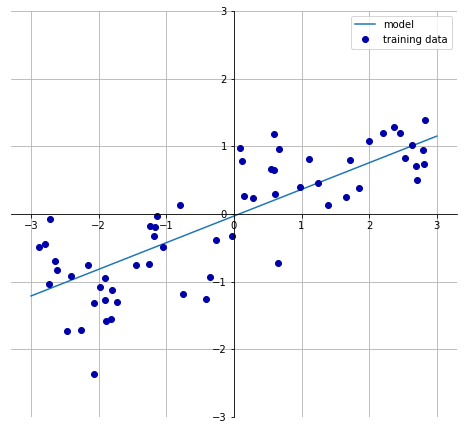

In [24]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

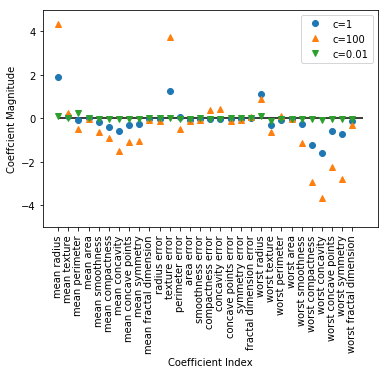

In [27]:
plt.plot(log_reg.coef_.T, 'o', label = 'c=1')
plt.plot(log_reg100.coef_.T, '^', label = 'c=100')
plt.plot(log_reg001.coef_.T, 'v', label = 'c=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Coefficient Index')
plt.ylabel('Coeffcient Magnitude')
plt.legend()
